# CONTENT AND NAME OF DEV

EGCO623 : DATA Mining and Machine Learning 

AND 

EGCO611 : Programming Techniques for Advanced Applications 

DEV NAME
--------------------------------------------------------

WATTANACHAI SANTIPAIBOON 
6636792


DETAIL OF THIS PROJECT
----------------------------------------------------------------

To classify the people who have risk of diabetes 
BY considering the ML that have higher accurency , AUC and recall valve of all ML technique that cosists of
*   Regression Technique
*   Naive Bayes Technique
*   K-nearest Neighbors Technique
*   Support Vector Machines Technique
*   Gradient Boosting Technique


# IMPORT LIB

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# IMPORT DATA AND CHECK BALANCING AND NULL VALUE

IMPORT DATA
----------------------------------------------------------------

In [3]:
data = pd.read_csv('./data.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


CHECK NULL AND BALANCING DATA
----------------------------------------------------------------

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()

print(f"missing value of [unba] data : {missing_values}")

# Separating the target variable and features
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']


#  check balancing data
print('\nbalancing data check')
y.value_counts() / y.shape[0]

missing value of [unba] data : Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

balancing data check


Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: count, dtype: float64

IN this dataset // we found that we have imbalancing data in this dataset 
// we need to balancing data

CHECK OVER FIX
----------------------------------------------------------------

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'diabetes_oversampled_data' is your DataFrame and it's already loaded
# Replace 'target_column' with the actual name of your target column
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Setup K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Replace 'accuracy' with your preferred metric

# Output the results
print("OVERFIT INPUT DATA [ Diabetes_binary ]")
print(f"Scores for each fold: {scores}")
print(f"Average score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


OVERFIT INPUT DATA [ Diabetes_binary ]
Scores for each fold: [0.86009934 0.85984311 0.86004021 0.85927152 0.86053295]
Average score: 0.8599574266792811
Standard deviation: 0.0004103063011948748


MAKING A BALANCING DATA 
----------------------------------------------------------------


OVER_SAMPLING

In [4]:
from sklearn.utils import resample

# Separating the dataset into the majority and minority classes
data_majority = data[data.Diabetes_binary == 0]
data_minority = data[data.Diabetes_binary == 1]

# Over-sampling the minority class
data_minority_oversampled = resample(data_minority,
                                     replace=True,     # sample with replacement
                                     n_samples=len(data_majority),    # to match majority class
                                     random_state=123) # reproducible results

# Combining the majority class with the oversampled minority class
diabetes_oversampled_data = pd.concat([data_majority, data_minority_oversampled])

# Checking the class distribution after over-sampling
oversampled_class_distribution = diabetes_oversampled_data['Diabetes_binary'].value_counts()

oversampled_class_distribution

diabetes_oversampled_data


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,1.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,6.0
90404,1.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,5.0
68894,1.0,1.0,0.0,0.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,30.0,0.0,1.0,7.0,5.0,5.0
41956,1.0,1.0,0.0,1.0,43.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,6.0,6.0


CHECK OVERFIX NEW OVER_SAMPLING DATA


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


X = diabetes_oversampled_data.drop('Diabetes_binary', axis=1)
y = diabetes_oversampled_data['Diabetes_binary']

model = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Replace 'accuracy' with your preferred metric


# Output the results
print("OVERSAMPLING INPUT DATA [ Diabetes_binary ]")
print(f"Scores for each fold: {scores}")
print(f"Average score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


OVERSAMPLING INPUT DATA [ Diabetes_binary ]
Scores for each fold: [0.94904619 0.94851948 0.94714544 0.95025935 0.94692728]
Average score: 0.9483795479117652
Standard deviation: 0.0012352944229289085


SMOKE OVERFIX


In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separating features and target variable
X = data.drop('Diabetes_binary', axis=1)  # Features
y = data['Diabetes_binary']  # Target variable

# Apply SMOTE for Over-sampling
smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data back into a DataFrame
diabetes_oversampled_data_smote = pd.DataFrame(X_resampled, columns=X.columns)
diabetes_oversampled_data_smote['Diabetes_binary'] = y_resampled

# Check the class distribution after over-sampling
oversampled_class_distribution_smote = diabetes_oversampled_data_smote['Diabetes_binary'].value_counts()
diabetes_oversampled_data_smote

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.000000,1.000000,1.0,40.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.0,5.000000,18.00000,15.000000,1.000000,0.000000,9.000000,4.000000,3.000000,0.0
1,0.000000,0.000000,0.0,25.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,...,1.0,3.000000,0.00000,0.000000,0.000000,0.000000,7.000000,6.000000,1.000000,0.0
2,1.000000,1.000000,1.0,28.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,1.0,5.000000,30.00000,30.000000,1.000000,0.000000,9.000000,4.000000,8.000000,0.0
3,1.000000,0.000000,1.0,27.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,...,0.0,2.000000,0.00000,0.000000,0.000000,0.000000,11.000000,3.000000,6.000000,0.0
4,1.000000,1.000000,1.0,24.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,...,0.0,2.000000,3.00000,0.000000,0.000000,0.000000,11.000000,5.000000,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436663,0.487809,0.000000,1.0,30.000000,1.000000,0.000000,0.000000,0.512191,0.0,0.000000,...,0.0,4.000000,0.00000,14.487809,0.487809,0.000000,10.000000,4.000000,4.975618,1.0
436664,0.067758,0.932242,1.0,33.932242,0.000000,0.067758,0.000000,0.932242,1.0,0.932242,...,0.0,4.000000,5.00000,15.067758,1.000000,0.000000,7.932242,5.864484,6.135516,1.0
436665,0.656081,0.343919,1.0,40.000000,1.000000,0.000000,0.000000,0.343919,0.0,1.000000,...,0.0,3.000000,0.00000,7.687838,0.343919,0.656081,5.000000,5.343919,8.000000,1.0
436666,1.000000,0.000000,1.0,39.390173,0.390173,0.000000,0.609827,0.609827,0.0,0.000000,...,0.0,3.000000,0.00000,0.000000,0.000000,0.609827,11.000000,5.000000,4.000000,1.0


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


X = diabetes_oversampled_data_smote.drop('Diabetes_binary', axis=1)
y = diabetes_oversampled_data_smote['Diabetes_binary']

model = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Replace 'accuracy' with your preferred metric

# Output the results
print("SMOTE INPUT DATA [ Diabetes_binary ]")
print(f"Scores for each fold: {scores}")
print(f"Average score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


SMOTE INPUT DATA [ Diabetes_binary ]
Scores for each fold: [0.92046626 0.91897772 0.91951588 0.92023634 0.91899969]
Average score: 0.9196391765773413
Standard deviation: 0.0006168196061391873


NEAR MISS TECHNIQUE


In [22]:
from imblearn.under_sampling import NearMiss

X_near=data.drop("Diabetes_binary",axis=1) 
Y_near=data["Diabetes_binary"]
nm = NearMiss(version = 1 , n_neighbors = 10)
near_x,near_y= nm.fit_resample(X_near,Y_near)

near_x




,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
2,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
3,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
4,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


CHECK OVERFIX OF NEAR MISS DATA

In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Initialize the model
model = RandomForestClassifier(random_state=42)

# Setup K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, near_x, near_y, cv=kf, scoring='accuracy')  # Replace 'accuracy' with your preferred metric

# Output the results
print("NEAR MISS  DATA [ Diabetes_binary ]")
print(f"Scores for each fold: {scores}")
print(f"Average score: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


NEAR MISS  DATA [ Diabetes_binary ]
Scores for each fold: [0.8752387  0.87502652 0.87904937 0.88039327 0.875725  ]
Average score: 0.8770865714355093
Standard deviation: 0.0022045010082577354


CREATE TARGET var and FEATUREs
----------------------------------------------------------------

In [5]:

# Separating the target variable and features
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# With ba data
X_balance_diabetes = diabetes_oversampled_data.drop('Diabetes_binary', axis=1)
y_balance_diabetes = diabetes_oversampled_data['Diabetes_binary']




# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_ba, X_test_ba, y_train_ba, y_test_ba = train_test_split(X_balance_diabetes, y_balance_diabetes, test_size=0.3 , random_state=42)



# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_ba = scaler.fit_transform(X_train_ba)
X_test_scaled_ba = scaler.transform(X_test_ba)

# FUNCTION 

ROC VISUALIZATION
----------------------------------------------------------------

In [7]:
from sklearn.metrics import roc_curve, auc as calculate_auc
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_cutoff_with_visualization(y_true, y_scores, name):
    """
    Find the optimal probability cutoff point for a classification model related to event rate
    and visualize ROC curve and the optimal point.
    Parameters:
    y_true : Matrix of Ground Truth (binary)
    y_scores : Matrix of Predicted scores, probability that the given instance belongs to the positive class
    Returns:
    float: Optimal cutoff value
    """
    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Calculate the G-mean for each threshold
    gmeans = np.sqrt(tpr * (1 - fpr))

    # Locate the index of the largest G-mean
    ix = np.argmax(gmeans)

    optimal_threshold = thresholds[ix]
    roc_auc = calculate_auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(4, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label=f'Optimal Threshold = {optimal_threshold:.4f}')
    plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(  '##' + name + ' || Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(f"Optimal Threshold: {optimal_threshold}, AUC: {roc_auc}")


    return optimal_threshold

# Example usage:
# optimal_cutoff = find_optimal_cutoff_with_visualization(y_test, y_probs)


SCORE OF EACH FEARUTEs FUNCTION
----------------------------------------------------------------

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_top_features(X, Y):
    # Apply SelectKBest class to extract top 10 best features
    best_features = SelectKBest(score_func=chi2, k=10)
    fit = best_features.fit(X, Y)

    # Create DataFrames for scores and feature names
    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(X.columns)

    # Concatenate two dataframes for better visualization
    feature_scores = pd.concat([df_columns, df_scores], axis=1)
    feature_scores.columns = ['Feature', 'Score']
    
    return feature_scores


# ML LEARNING TECHNIQUE(S)

REGRESSION TECHNIQUE
----------------------------------------------------------------

[Unbalancing Data]
=========== Logic Regression Model =============
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.54      0.16      0.25     10499

    accuracy                           0.87     76104
   macro avg       0.71      0.57      0.59     76104
weighted avg       0.83      0.87      0.83     76104

Accuracy: 86.53%
Time Training : 0.0 hour

***************AOC*****************


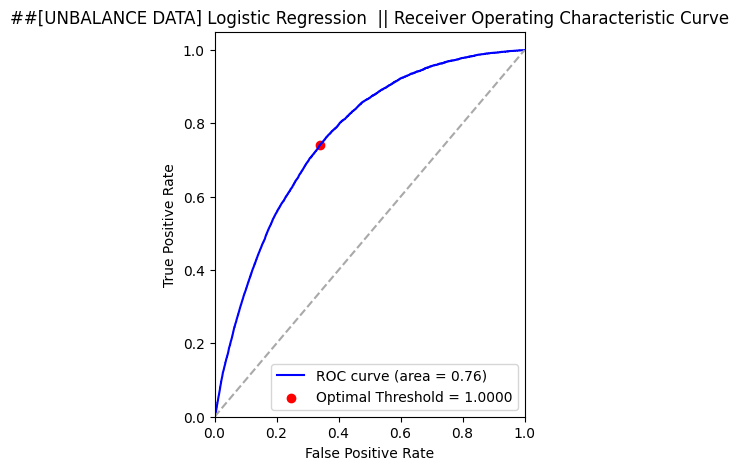

Optimal Threshold: 0.9999984124473685, AUC: 0.7646220519337843


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Initializing and training the Logistic Regression model
starttime = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
endtime = time.time()
log_reg.fit(X_train_scaled, y_train)

# Predicting on the test set

y_pred = log_reg.predict(X_test_scaled)


# Calculating accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


training_time = endtime-endtime

formatted_accuracy = f"Accuracy: {accuracy:.2%}"
formatted_report = "Classification Report:" + report


print('[Unbalancing Data]')
print("=========== Logic Regression Model =============")
print(report)
print("==============================================")
print(formatted_accuracy)
print(f"Time Training : {training_time/3600} hour")


X_train_ba_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test_ba_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_probs = log_reg.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AOC*****************")
name = "[UNBALANCE DATA] Logistic Regression "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test, y_probs, name)





[Balancing Data]
=========== Logic Regression Model =============
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     65481
         1.0       0.74      0.76      0.75     65520

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001

Accuracy: 74.41%
Time Training : 0.0 hour

***************AOC*****************


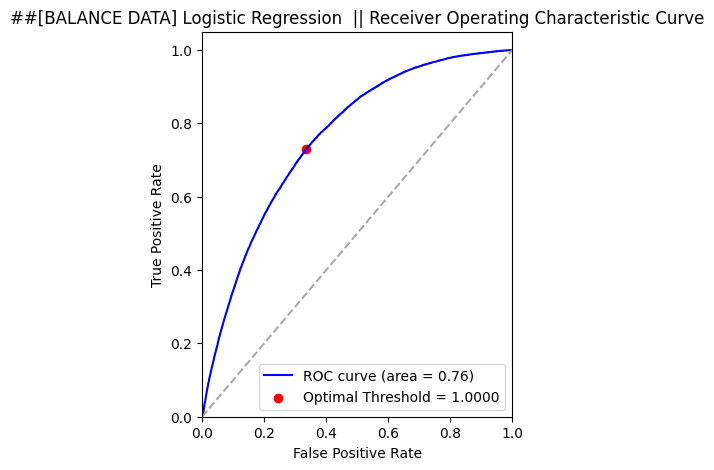

Optimal Threshold: 0.9999999972297935, AUC: 0.7619109816110663


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Initializing and training the Logistic Regression model
starttime = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
endtime = time.time()
log_reg.fit(X_train_scaled_ba, y_train_ba)

# Predicting on the test set

y_pred = log_reg.predict(X_test_scaled_ba)


# Calculating accuracy and other metrics
accuracy = accuracy_score(y_test_ba, y_pred)
report = classification_report(y_test_ba, y_pred)


training_time = endtime-endtime
formatted_accuracy = f"Accuracy: {accuracy:.2%}"
formatted_report = "Classification Report:" + report


print('[Balancing Data]')
print("=========== Logic Regression Model =============")
print(report)
print("==============================================")
print(formatted_accuracy)
print(f"Time Training : {training_time/3600} hour")

X_train_ba_np = X_train_ba.to_numpy() if isinstance(X_train_ba, pd.DataFrame) else X_train_ba
X_test_ba_np = X_test_ba.to_numpy() if isinstance(X_test_ba, pd.DataFrame) else X_test_ba
y_probs = log_reg.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AOC*****************")
name = "[BALANCE DATA] Logistic Regression "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs, name)





 Naive Bayes TECHNIQUE
 ----------------------------------------------------------------

[Unbalancing data]
============ Naive Bay Model ==========
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86     65605
         1.0       0.32      0.56      0.41     10499

    accuracy                           0.77     76104
   macro avg       0.62      0.68      0.63     76104
weighted avg       0.84      0.77      0.80     76104

Accuracy : 77.18% 

***************AOC*****************


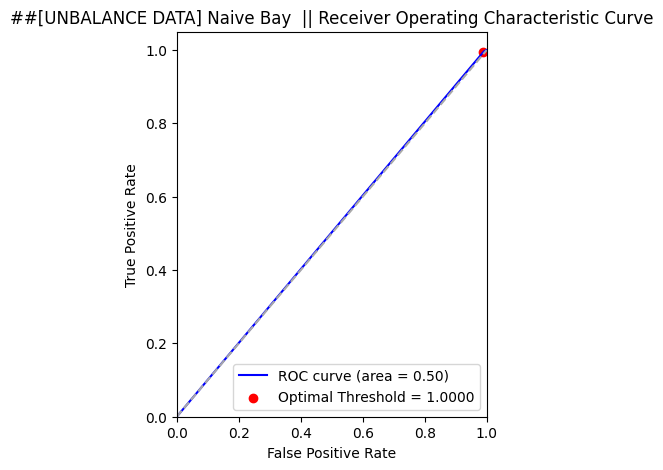

Optimal Threshold: 1.0, AUC: 0.5029405197960394


In [74]:
from sklearn.naive_bayes import GaussianNB
import time

starttime = time.time()


nb_model = GaussianNB()

nb_model.fit(X_train_scaled, y_train)

# predicting on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

endtime = time.time()

training_time = endtime - starttime

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)



print('[Unbalancing data]')
print("============ Naive Bay Model ==========")
print(report_nb)
print("==============================================")
print(f"Accuracy : {accuracy_nb:.2%} ")


X_train_ba_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test_ba_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_probs = nb_model.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AOC*****************")
name = "[UNBALANCE DATA] Naive Bay "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test, y_probs, name)


[Balancing Data]
============ Naive Bay Model ==========
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72     65481
         1.0       0.72      0.70      0.71     65520

    accuracy                           0.71    131001
   macro avg       0.71      0.71      0.71    131001
weighted avg       0.71      0.71      0.71    131001

Accuracy : 71.41% 

***************AOC*****************


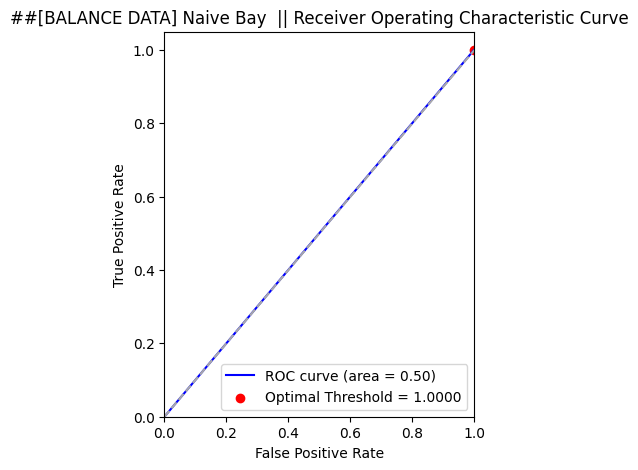

Optimal Threshold: 1.0, AUC: 0.5007179125341266


In [8]:
from sklearn.naive_bayes import GaussianNB
import time




nb_model = GaussianNB()
starttime = time.time()
nb_model.fit(X_train_scaled_ba, y_train_ba)
y_pred_nb = nb_model.predict(X_test_scaled_ba)
endtime = time.time()

training_time = endtime - starttime

accuracy_nb = accuracy_score(y_test_ba, y_pred_nb)
report_nb = classification_report(y_test_ba, y_pred_nb)



print('[Balancing Data]')
print("============ Naive Bay Model ==========")
print(report_nb)
print("==============================================")
print(f"Accuracy : {accuracy_nb:.2%} ")


X_train_ba_np = X_train_ba.to_numpy() if isinstance(X_train_ba, pd.DataFrame) else X_train_ba
X_test_ba_np = X_test_ba.to_numpy() if isinstance(X_test_ba, pd.DataFrame) else X_test_ba
y_probs = nb_model.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AOC*****************")
name = "[BALANCE DATA] Naive Bay "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs, name)




Artificial Neural Network
---------------------------------------------------------------- 

[UNBALANCING DATASETS]
 ==== Artificial neural network  =====
Epoch 1/10
3885/3885 - 7s - loss: 0.3304 - accuracy: 0.8581 - val_loss: 0.3176 - val_accuracy: 0.8645 - 7s/epoch - 2ms/step
Epoch 2/10
3885/3885 - 6s - loss: 0.3151 - accuracy: 0.8650 - val_loss: 0.3161 - val_accuracy: 0.8658 - 6s/epoch - 2ms/step
Epoch 3/10
3885/3885 - 6s - loss: 0.3139 - accuracy: 0.8655 - val_loss: 0.3155 - val_accuracy: 0.8655 - 6s/epoch - 2ms/step
Epoch 4/10
3885/3885 - 6s - loss: 0.3132 - accuracy: 0.8657 - val_loss: 0.3161 - val_accuracy: 0.8655 - 6s/epoch - 2ms/step
Epoch 5/10
3885/3885 - 6s - loss: 0.3128 - accuracy: 0.8659 - val_loss: 0.3161 - val_accuracy: 0.8656 - 6s/epoch - 2ms/step
Epoch 6/10
3885/3885 - 6s - loss: 0.3124 - accuracy: 0.8664 - val_loss: 0.3155 - val_accuracy: 0.8661 - 6s/epoch - 2ms/step
Epoch 7/10
3885/3885 - 6s - loss: 0.3121 - accuracy: 0.8666 - val_loss: 0.3151 - val_accuracy: 0.8653 - 6s/epoch - 2ms/step
Epoch 8/10
3885/3885 - 6s - loss: 0.3120 - accuracy: 0.8658 - val_loss

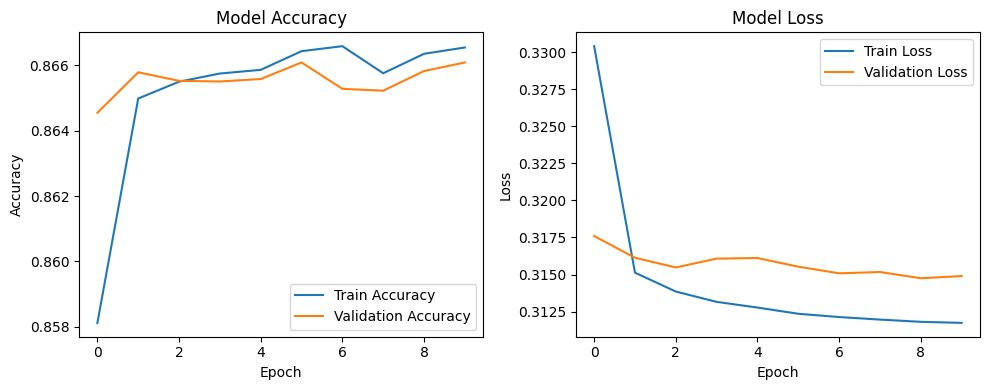

2379/2379 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.58      0.14      0.23     10499

    accuracy                           0.87     76104
   macro avg       0.73      0.56      0.58     76104
weighted avg       0.84      0.87      0.83     76104

Accuracy : 0.867786169052124
Loss : 0.31103789806365967
Time Training : 1.0519114494323731 minutes


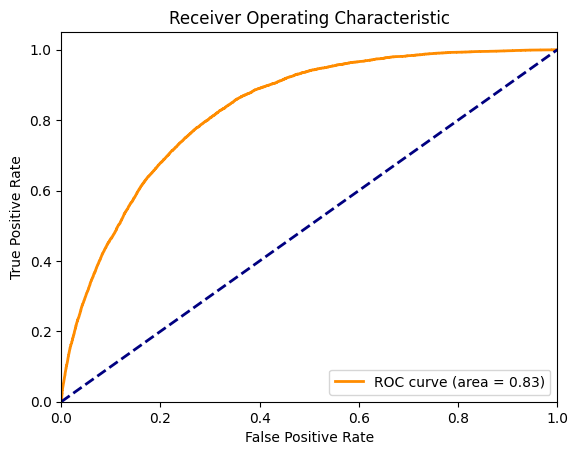

AUC: 0.8293994646921963


In [18]:
import tensorflow as tf
import time
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt


print("[UNBALANCING DATASETS]")
print(' ==== Artificial neural network  =====')
# Defining the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

starttime = time.time()

# Training the model
history = model.fit(X_train_scaled, y_train, validation_split=0.3, epochs=10, batch_size=32, verbose=2)

endtime = time.time()

time_training = endtime - starttime

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Plotting training history
plt.figure(figsize=(10, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

print(f"Accuracy : {accuracy}")
print(f"Loss : {loss}")
print(f"Time Training : {time_training / 60 } minutes")



# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {auc}")


[BALANCING DATASETS]
 ==== Artificial neural network  =====
Epoch 1/10
6687/6687 - 12s - loss: 0.5169 - accuracy: 0.7430 - val_loss: 0.5062 - val_accuracy: 0.7510 - 12s/epoch - 2ms/step
Epoch 2/10
6687/6687 - 10s - loss: 0.5021 - accuracy: 0.7531 - val_loss: 0.5049 - val_accuracy: 0.7517 - 10s/epoch - 2ms/step
Epoch 3/10
6687/6687 - 11s - loss: 0.5006 - accuracy: 0.7537 - val_loss: 0.5038 - val_accuracy: 0.7523 - 11s/epoch - 2ms/step
Epoch 4/10
6687/6687 - 10s - loss: 0.5000 - accuracy: 0.7542 - val_loss: 0.5029 - val_accuracy: 0.7536 - 10s/epoch - 2ms/step
Epoch 5/10
6687/6687 - 11s - loss: 0.4995 - accuracy: 0.7544 - val_loss: 0.5035 - val_accuracy: 0.7538 - 11s/epoch - 2ms/step
Epoch 6/10
6687/6687 - 10s - loss: 0.4993 - accuracy: 0.7551 - val_loss: 0.5030 - val_accuracy: 0.7546 - 10s/epoch - 2ms/step
Epoch 7/10
6687/6687 - 12s - loss: 0.4989 - accuracy: 0.7556 - val_loss: 0.5032 - val_accuracy: 0.7532 - 12s/epoch - 2ms/step
Epoch 8/10
6687/6687 - 11s - loss: 0.4987 - accuracy: 0.75

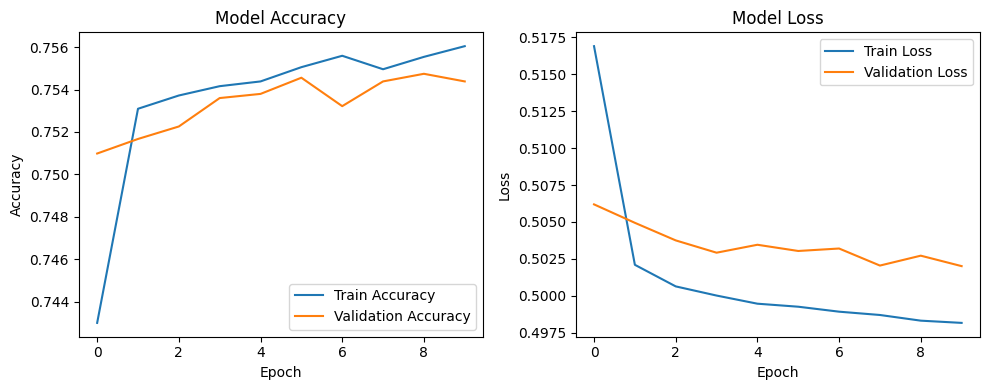

4094/4094 [==============================] - 5s 1ms/step
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     65481
         1.0       0.73      0.80      0.77     65520

    accuracy                           0.75    131001
   macro avg       0.76      0.75      0.75    131001
weighted avg       0.76      0.75      0.75    131001

Accuracy : 0.7533453702926636
Loss : 0.5029506683349609
Time Training : 1.796754769484202 minutes


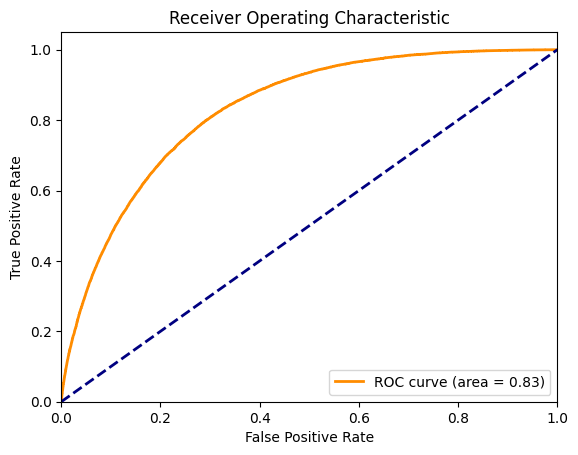

AUC: 0.8296604187433206


In [19]:
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt


print("[BALANCING DATASETS]")
print(' ==== Artificial neural network  =====')

# Defining the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

starttime = time.time()

# Training the model
history = model.fit(X_train_scaled_ba, y_train_ba, validation_split=0.3, epochs=10, batch_size=32, verbose=2)

endtime = time.time()

time_training = endtime - starttime

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_scaled_ba, y_test_ba, verbose=0)

# Plotting training history
plt.figure(figsize=(10, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Make predictions
y_pred_prob = model.predict(X_test_scaled_ba)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary labels


# Generate classification report
report = classification_report(y_test_ba, y_pred)
print(report)
print('========================================')
print(f"Accuracy : {accuracy}")
print(f"Loss : {loss}")
print(f"Time Training : {time_training/60} minutes")


# Calculate the AUC
auc = roc_auc_score(y_test_ba, y_pred_prob)



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_ba, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {auc}")


K-Nearest Neighbors TECHNIQUE
----------------------------------------------------------------

[UNBALANCING DATA]
=============== KNN MODEL  =====================
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     65605
         1.0       0.47      0.12      0.19     10499

    accuracy                           0.86     76104
   macro avg       0.67      0.55      0.56     76104
weighted avg       0.82      0.86      0.82     76104

Accuracy: 0.860230736886366
Time Training : 0.04221177101135254 sec

***************AOC*****************


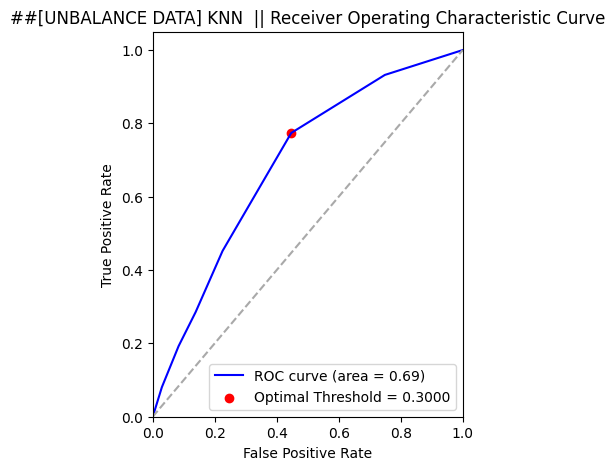

Optimal Threshold: 0.3, AUC: 0.6897057812053756


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import time



# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)

starttime = time.time()

# Training the model
knn_model.fit(X_train_scaled, y_train)

endtime = time.time()
# Predicting on the test set
y_pred_knn = knn_model.predict(X_test_scaled)



# Calculating accuracy and other metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print('[UNBALANCING DATA]')
print("=============== KNN MODEL  =====================")
print(report_knn)
print(f"Accuracy: {accuracy_knn}")
print(f"Time Training : {(endtime - starttime)} sec")

X_train_ba_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test_ba_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_probs = knn_model.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AOC*****************")
name = "[UNBALANCE DATA] KNN "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test, y_probs, name)


[UNBALANCING DATA]
=============== KNN MODEL  =====================
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76     65481
         1.0       0.75      0.83      0.79     65520

    accuracy                           0.78    131001
   macro avg       0.78      0.78      0.78    131001
weighted avg       0.78      0.78      0.78    131001

Accuracy: 0.7782154334699735
Time Training : 0.315471887588501 sec

***************AOC*****************


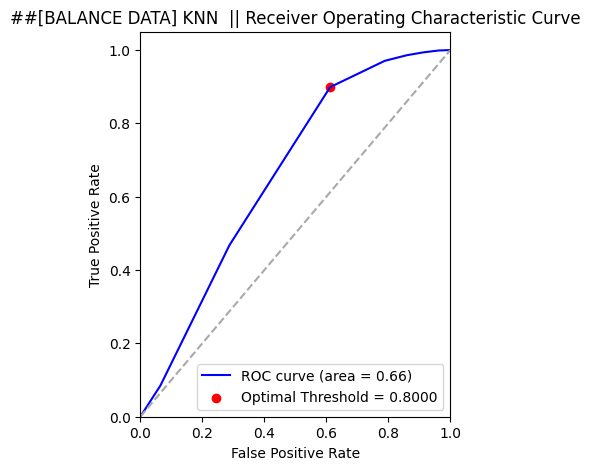

Optimal Threshold: 0.8, AUC: 0.6601509807046528


In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import time



# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)

starttime = time.time()

# Training the model
knn_model.fit(X_train_scaled_ba, y_train_ba)

endtime = time.time()
# Predicting on the test set
y_pred_knn = knn_model.predict(X_test_scaled_ba)



# Calculating accuracy and other metrics
accuracy_knn = accuracy_score(y_test_ba, y_pred_knn)
report_knn = classification_report(y_test_ba, y_pred_knn)

print('[UNBALANCING DATA]')
print("=============== KNN MODEL  =====================")
print(report_knn)
print(f"Accuracy: {accuracy_knn}")
print(f"Time Training : {(endtime - starttime)} sec")


X_train_ba_np = X_train_ba.to_numpy() if isinstance(X_train_ba, pd.DataFrame) else X_train_ba
X_test_ba_np = X_test_ba.to_numpy() if isinstance(X_test_ba, pd.DataFrame) else X_test_ba
y_probs = knn_model.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AOC*****************")
name = "[BALANCE DATA] KNN "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs, name)

Support Vector Machines TECHNIQUE
----------------------------------------------------------------

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time

# Splitting the dataset into training and testing sets

starttime = time.time()

# Training the SVM model
svm_model = SVC(kernel='linear',random_state=42 )
svm_model.fit(X_train, y_train)

endtime = time.time()
# Predicting and evaluating the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('[UNBALANCE DATA]')
print('=========== SVM Model =================')
print(report)
print(f"Accuracy : {accuracy} ")
print(f"Time Training : {(endtime - starttime) / 3600 } ")

[UNBALANCE DATA]
=========== SVM Model =================
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     65605
         1.0       0.00      0.00      0.00     10499

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104

Accuracy : 0.8620440449910649 
Time Training : 1.6066242994202509 


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time

# Splitting the dataset into training and testing sets

starttime = time.time()

# Training the SVM model
svm_model = SVC(kernel='linear',random_state=42 )
svm_model.fit(X_train_ba, y_train_ba)

endtime = time.time()
# Predicting and evaluating the model
y_pred = svm_model.predict(X_test_ba)
accuracy = accuracy_score(y_test_ba, y_pred)
report = classification_report(y_test_ba, y_pred)

print('[BALANCE DATA]')
print('=========== SVM Model =================')
print(report)
print(f"Accuracy : {accuracy} ")
print(f"Time Training : {(endtime - starttime) / 3600}  Hours")

[BALANCE DATA]
=========== SVM Model =================
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     65481
         1.0       0.73      0.79      0.76     65520

    accuracy                           0.74    131001
   macro avg       0.75      0.74      0.74    131001
weighted avg       0.75      0.74      0.74    131001

Accuracy : 0.7446355371333043 
Time Training : 8.001176484160952 


LinearSVC

[BALANCE DATA]
=========== LinearSVC Model =================
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     65481
         1.0       0.73      0.77      0.75     65520

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001

Accuracy : 0.743849283593255 
Time Training : 0.0009875438610712688  Hours


/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



***************AUC*****************


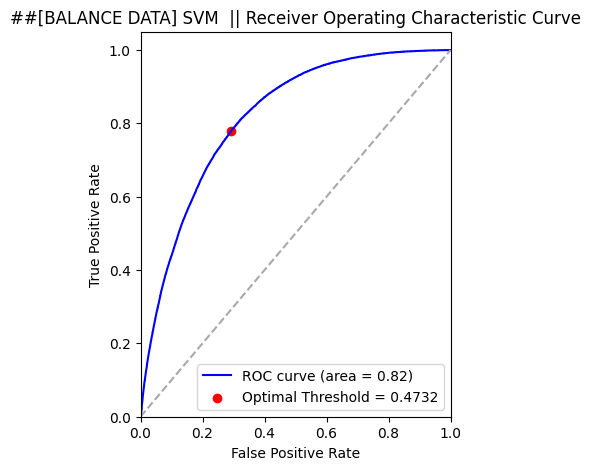

Optimal Threshold: 0.473234945217584, AUC: 0.8172611977042842


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import time

from sklearn.calibration import CalibratedClassifierCV

# Splitting the dataset into training and testing sets
# (Ensure that X_train_ba, y_train_ba, X_test_ba, y_test_ba are already defined)

starttime = time.time()

# Training the LinearSVC model
linear_svc_model = LinearSVC(dual=False, random_state=42)
linear_svc_model.fit(X_train_ba, y_train_ba)

endtime = time.time()

# Predicting and evaluating the model
y_pred = linear_svc_model.predict(X_test_ba)
accuracy = accuracy_score(y_test_ba, y_pred)
report = classification_report(y_test_ba, y_pred)

print('[BALANCE DATA]')
print('=========== LinearSVC Model =================')
print(report)
print(f"Accuracy : {accuracy} ")
print(f"Time Training : {(endtime - starttime) / 3600}  Hours")

# Convert DataFrames to NumPy arrays if necessary
X_train_ba_np = X_train_ba.to_numpy() if isinstance(X_train_ba, pd.DataFrame) else X_train_ba
X_test_ba_np = X_test_ba.to_numpy() if isinstance(X_test_ba, pd.DataFrame) else X_test_ba

# Train a LinearSVC model
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train_ba_np, y_train_ba)

# Calibrate the LinearSVC model
calibrated_svc = CalibratedClassifierCV(linear_svc_model, method='sigmoid', cv='prefit')
calibrated_svc.fit(X_train_ba_np, y_train_ba)

# Now you can use predict_proba
y_probs = calibrated_svc.predict_proba(X_test_ba_np)[:, 1]
print("\n***************AUC*****************")
name = "[BALANCE DATA] SVM "
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs, name)

## UnBalance Dataset 
====== RANDOM FOREST ========= 
Accuracy: 0.8600336381793335
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65605
         1.0       0.48      0.17      0.25     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.57      0.59     76104
weighted avg       0.82      0.86      0.83     76104

Time Training : 25.984353065490723 seconds

***************AOC*****************


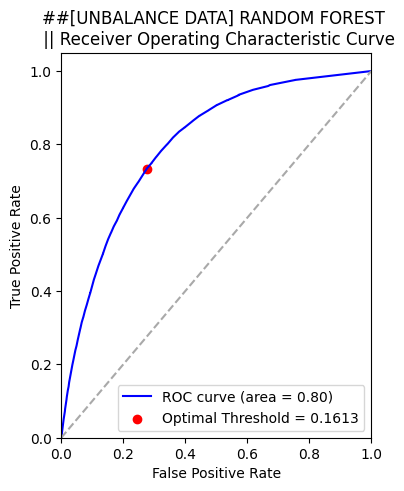

Optimal Threshold: 0.16133333333333333, AUC: 0.7992656654711758


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time


# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train, y_train)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print ("## UnBalance Dataset ")
print ("====== RANDOM FOREST ========= ")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")

y_probs = clf.predict_proba(X_test)[:, 1]
print("\n***************AOC*****************")
name = "[UNBALANCE DATA] RANDOM FOREST \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test, y_probs,name)



## Balance Dataset 
============ RANDOM FOREST MODEL =================
Accuracy: 0.9401454950725567
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     65481
         1.0       0.90      0.99      0.94     65520

    accuracy                           0.94    131001
   macro avg       0.94      0.94      0.94    131001
weighted avg       0.94      0.94      0.94    131001

Time Training : 37.245673179626465 seconds

***************AOC*****************


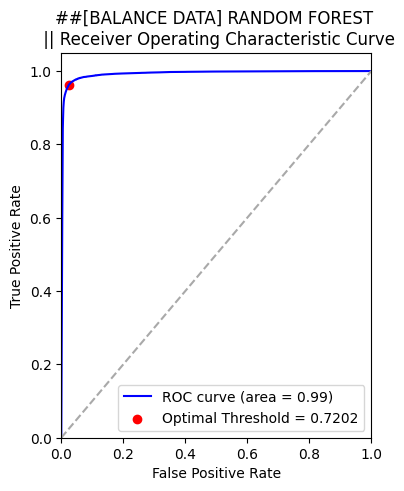

Optimal Threshold: 0.7202475024975021, AUC: 0.9924649677014868


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time


# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_ba, y_train_ba)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test_ba)

# Evaluate the model
accuracy = accuracy_score(y_test_ba, y_pred)
report = classification_report(y_test_ba, y_pred)
print ("## Balance Dataset ")
print ("============ RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")


y_probs = clf.predict_proba(X_test_ba)[:, 1]
print("\n***************AOC*****************")
name = "[BALANCE DATA] RANDOM FOREST \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs,name)





Gradient Boosting TECHNIQUE
----

[UNBALANCING DATA]
 === Gradient Boosting ===
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.56      0.17      0.26     10499

    accuracy                           0.87     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.84      0.87      0.84     76104

accuracy : 0.8671029118048985

***************AOC*****************


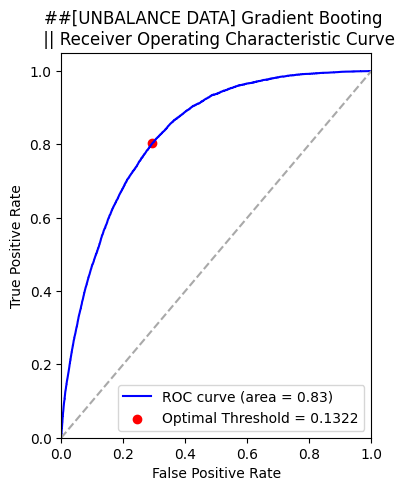

Optimal Threshold: 0.1321845368935806, AUC: 0.8301483298401025


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)
# Predict and evaluate the model
predictions = gbm.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print('[UNBALANCING DATA]')
print(' === Gradient Boosting ===')
print(report)
print(f"accuracy : {accuracy}")


y_probs = gbm.predict_proba(X_test)[:, 1]
print("\n***************AOC*****************")
name = "[UNBALANCE DATA] Gradient Booting \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test, y_probs,name)


[BALANCING]
 === Gradient Boosting ===
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     65481
         1.0       0.73      0.79      0.76     65520

    accuracy                           0.75    131001
   macro avg       0.75      0.75      0.75    131001
weighted avg       0.75      0.75      0.75    131001

accuracy : 0.7519560919382294

***************AOC*****************


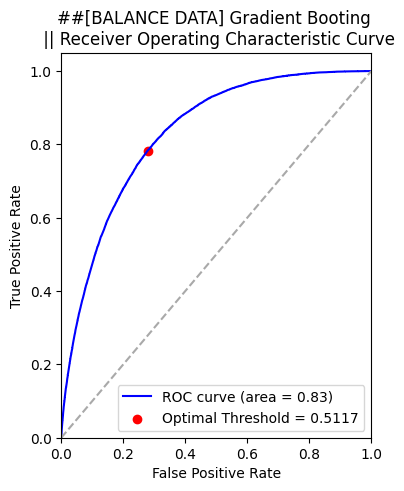

Optimal Threshold: 0.5116953781776766, AUC: 0.829554856916897


In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train_ba, y_train_ba)
# Predict and evaluate the model
predictions = gbm.predict(X_test_ba)

accuracy = accuracy_score(y_test_ba, predictions)
report = classification_report(y_test_ba, predictions)

print('[BALANCING]')
print(' === Gradient Boosting ===')
print(report)
print(f"accuracy : {accuracy}")

y_probs = gbm.predict_proba(X_test_ba)[:, 1]
print("\n***************AUC*****************")
name = "[BALANCE DATA] Gradient Booting \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs,name)


 Random Forest TECHNIQUE
 ------

# CHOOSING TECHINQUE AND EVALUATION


RANDOM FOREST [CHOOSEING]
-------------------------------- 
ROC = .99
RECALL (BE DIABETES) = 0.99
ACCAURACY = 94.01

## Balance Dataset 
============ RANDOM FOREST MODEL =================
Accuracy: 0.9403363333104328
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     65481
         1.0       0.90      0.99      0.94     65520

    accuracy                           0.94    131001
   macro avg       0.94      0.94      0.94    131001
weighted avg       0.94      0.94      0.94    131001

Time Training : 31.945836782455444 seconds

***************AOC*****************


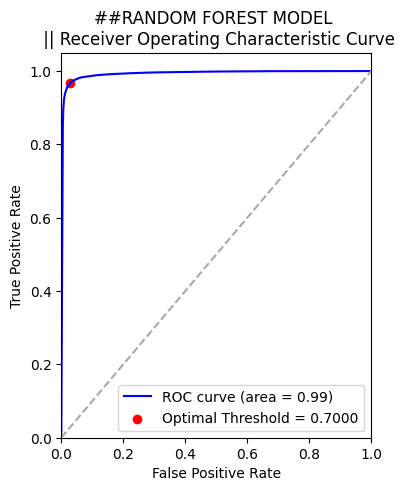

Optimal Threshold: 0.700041514041514, AUC: 0.9923926829178924


In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_ba, y_train_ba)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test_ba)

# Evaluate the model
accuracy = accuracy_score(y_test_ba, y_pred)
report = classification_report(y_test_ba, y_pred)
print ("## Balance Dataset ")
print ("============ RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")


y_probs = clf.predict_proba(X_test_ba)[:, 1]
print("\n***************AOC*****************")
name = "RANDOM FOREST MODEL \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs, name)



# # Compute confusion matrix
# cm = confusion_matrix(y_test_ba, y_pred)

# # Plot confusion matrix
# sns.heatmap(cm, annot=True, fmt="d")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


ADJUST WITH A NEW THRESHOLD
----------------------------------------------------------------

## T= 0.7
============ RANDOM FOREST MODEL =================
Accuracy: 0.9683513866306364
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     65481
         1.0       0.97      0.97      0.97     65520

    accuracy                           0.97    131001
   macro avg       0.97      0.97      0.97    131001
weighted avg       0.97      0.97      0.97    131001

Time Training: 37.16936492919922 seconds

***************AOC*****************


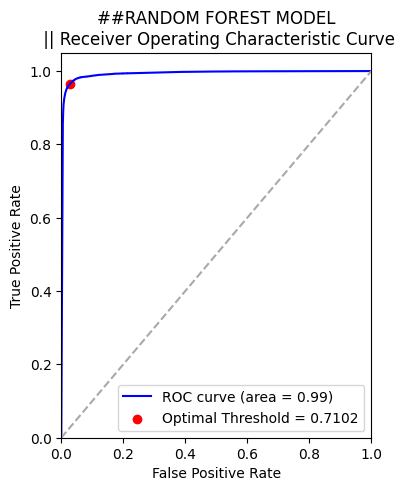

Optimal Threshold: 0.7101785714285714, AUC: 0.9924309118114383


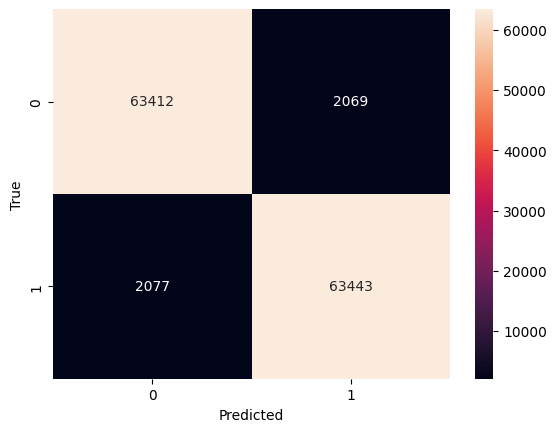

In [11]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming find_optimal_cutoff_with_visualization is a custom or imported function
# from your_module import find_optimal_cutoff_with_visualization

# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_ba, y_train_ba)
endtime = time.time()

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test_ba)[:, 1]

# Apply threshold
threshold = 0.7
y_pred = (y_probs >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test_ba, y_pred)
report = classification_report(y_test_ba, y_pred)
print("## T= 0.7")
print("============ RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training: {endtime - starttime} seconds")

print("\n***************AOC*****************")
name = "RANDOM FOREST MODEL\n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_ba, y_probs, name)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test_ba, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SCORE OF EACH FERAUTE AND CHOOSING

In [100]:
diabetes_oversampled_data


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196,1.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,6.0
90404,1.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,5.0
68894,1.0,1.0,0.0,0.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,30.0,0.0,1.0,7.0,5.0,5.0
41956,1.0,1.0,0.0,1.0,43.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,6.0,6.0


DATA TABLE 
| Variable Name          | Type    | Description |
|------------------------|---------|-------------|
| Diabetes_binary        | Binary  | 0 = no diabetes, 1 = prediabetes or diabetes |
| HighBP                 | Binary  | 0 = no high BP, 1 = high BP |
| HighChol               | Binary  | 0 = no high cholesterol, 1 = high cholesterol |
| CholCheck              | Binary  | 0 = no cholesterol checks in 5 years, 1 = cholesterol check in 5 years |
| BMI                    | Integer | Body Mass Index |
| Smoker                 | Binary  | 0 = no, 1 = yes (smoked at least 100 cigarettes in lifetime) |
| Stroke                 | Binary  | 0 = no, 1 = yes (ever told had a stroke) |
| HeartDiseaseOrAttack   | Binary  | 0 = no, 1 = yes (coronary heart disease or myocardial infarction) |
| PhysActivity           | Binary  | 0 = no, 1 = yes (physical activity in past 30 days excluding job) |
| Fruits                 | Binary  | 0 = no, 1 = yes (consume fruit 1+ times per day) |
| Veggies                | Binary  | 0 = no, 1 = yes (consume vegetables 1+ times per day) |
| HvyAlcoholConsump      | Binary  | 0 = no, 1 = yes (heavy drinking) |
| AnyHealthcare          | Binary  | 0 = no, 1 = yes (any kind of health care coverage) |
| NoDocbcCost            | Binary  | 0 = no, 1 = yes (couldn't see doctor due to cost in past year) |
| GenHlth                | Integer | Scale 1-5 (1 = excellent, 5 = poor) |
| MentHlth               | Integer | Scale 1-30 days (days in past 30 days with poor mental health) |
| PhysHlth               | Integer | Scale 1-30 days (days in past 30 days with poor physical health) |
| DiffWalk               | Binary  | 0 = no, 1 = yes (difficulty walking or climbing stairs) |
| Sex                    | Binary  | 0 = female, 1 = male |
| Age                    | Integer | 13-level age category (e.g., 1 = 18-24, 9 = 60-64, 13 = 80 or older) |
| Education              | Integer | Education level (scale 1-6) |
| Income                 | Integer | Income scale (scale 1-8) |


In [11]:
print("FEATURE score FROM MORE TO LESS")
m_l = select_top_features(diabetes_oversampled_data.drop(['Diabetes_binary'], axis=1), diabetes_oversampled_data['Diabetes_binary'])
m_l.sort_values(by = 'Score' , ascending = False)

FEATURE score FROM MORE TO LESS


,Feature,Score
15,PhysHlth,352949.702187
14,MentHlth,63497.016956
3,BMI,62141.280310
13,GenHlth,31640.656328
18,Age,31459.329401
0,HighBP,27169.224168
16,DiffWalk,24097.491794
20,Income,18590.262886
1,HighChol,16840.896207
6,HeartDiseaseorAttack,16328.424229


DROP VARRIABLE OUT (TOP 5 LESS SCORE OF FEATUERs)
----------------------------------------------------------------

In [193]:
# With ba data
X_balance_diabetes_cc = diabetes_oversampled_data.drop(['Diabetes_binary','Sex','CholCheck','Veggies','Fruits','AnyHealthcare'], axis=1)
y_balance_diabetes_cc = diabetes_oversampled_data['Diabetes_binary']




# Splitting the data into training and test sets
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_balance_diabetes_cc, y_balance_diabetes_cc, test_size=0.3 , random_state=42)




# Standardizing the features
scaler = StandardScaler()
X_train_scaled_cc = scaler.fit_transform(X_train_cc)
X_test_scaled_cc = scaler.transform(X_test_cc)


# Checking for missing values
missing_values = X_balance_diabetes_cc.isnull().sum()

print("AT. AND MISING VALUE")
print("--------------------------------")
print(missing_values)




AT. AND MISING VALUE
--------------------------------
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
dtype: int64


[RESULT] DROP TOP 5 OF LESS SCORES FEATURE

## Balance Dataset 
============ RANDOM FOREST MODEL =================
Accuracy: 0.9234509660231601
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92     65481
         1.0       0.88      0.98      0.93     65520

    accuracy                           0.92    131001
   macro avg       0.93      0.92      0.92    131001
weighted avg       0.93      0.92      0.92    131001

Time Training : 29.439476251602173 seconds

***************AOC*****************


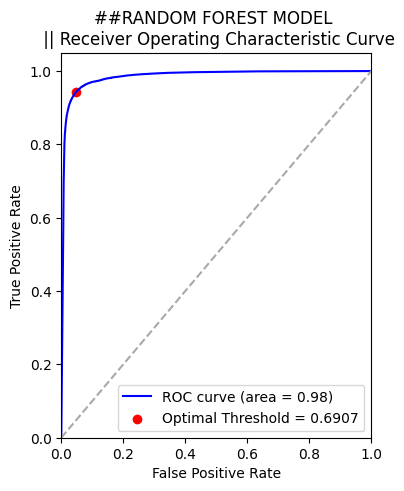

Optimal Threshold: 0.6907103174603173, AUC: 0.984440051690189


In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_cc, y_train_cc)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test_cc)

# Evaluate the model
accuracy = accuracy_score(y_test_cc, y_pred)
report = classification_report(y_test_cc, y_pred)
print ("## Balance Dataset ")
print ("============ RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")


y_probs = clf.predict_proba(X_test_cc)[:, 1]
print("\n***************AOC*****************")
name = "RANDOM FOREST MODEL \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_cc, y_probs, name)



SELECT ONLY TOP 5 OF HIGHER FEATURE SCORES
----------------------------------------------------------------

## Balance Dataset 
============ [TOP 5 FEATURE] RANDOM FOREST MODEL =================
Accuracy: 0.7878031465408661
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78     65481
         1.0       0.76      0.84      0.80     65520

    accuracy                           0.79    131001
   macro avg       0.79      0.79      0.79    131001
weighted avg       0.79      0.79      0.79    131001

Time Training : 25.49027395248413 seconds

***************AOC*****************


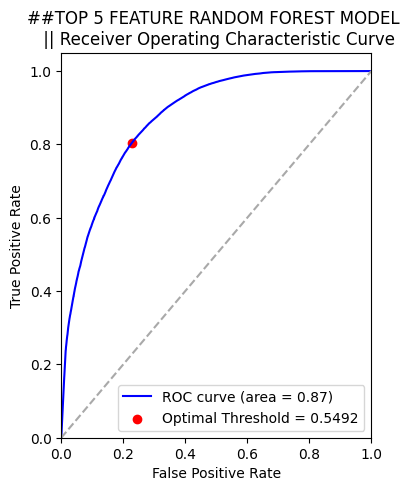

Optimal Threshold: 0.5491507936507937, AUC: 0.8737587390783547


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# With ba data
X_balance_diabetes_cc_top5 = diabetes_oversampled_data.drop(['Diabetes_binary','HighBP','DiffWalk','Income','HighChol','HeartDiseaseorAttack',
                                                        'Stroke','HvyAlcoholConsump','PhysActivity','Education','Smoker','NoDocbcCost','Sex','CholCheck','Veggies','Fruits','AnyHealthcare'], axis=1)
y_balance_diabetes_cc_top5 = diabetes_oversampled_data['Diabetes_binary']

# Splitting the data into training and test sets
X_train_cc_top5, X_test_cc_top5, y_train_cc_top5, y_test_cc_top5 = train_test_split(X_balance_diabetes_cc_top5, y_balance_diabetes_cc_top5, test_size=0.3 , random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled_cc_top5 = scaler.fit_transform(X_train_cc_top5)
X_test_scaled_cc_top5 = scaler.transform(X_test_cc_top5)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_cc_top5, y_train_cc_top5)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test_cc_top5)

# Evaluate the model
accuracy = accuracy_score(y_test_cc_top5, y_pred)
report = classification_report(y_test_cc_top5, y_pred)
print ("## Balance Dataset ")
print ("============ [TOP 5 FEATURE] RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")


y_probs = clf.predict_proba(X_test_cc_top5)[:, 1]
print("\n***************AOC*****************")
name = "TOP 5 FEATURE RANDOM FOREST MODEL \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_cc_top5, y_probs, name)



SELECT TOP 10 FEATUREs 
----- 

## Balance Dataset 
============ [TOP 10 FEATURE] RANDOM FOREST MODEL =================
Accuracy: 0.8786421477698644
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87     65481
         1.0       0.84      0.93      0.88     65520

    accuracy                           0.88    131001
   macro avg       0.88      0.88      0.88    131001
weighted avg       0.88      0.88      0.88    131001

Time Training : 47.65963172912598 seconds

***************AOC*****************


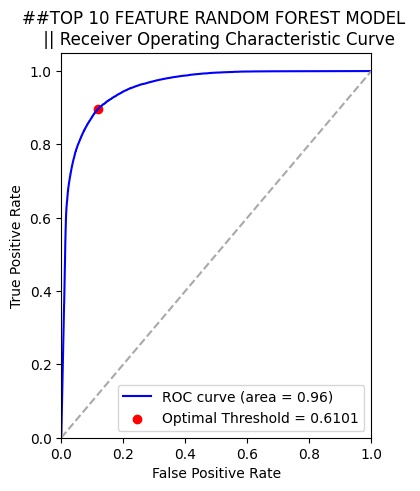

Optimal Threshold: 0.6100687099873169, AUC: 0.9562945153781618


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# With ba data
X_balance_diabetes_cc_top10 = diabetes_oversampled_data.drop(['Diabetes_binary',
                                                        'Stroke','HvyAlcoholConsump','PhysActivity','Education','Smoker','NoDocbcCost','Sex','CholCheck','Veggies','Fruits','AnyHealthcare'], axis=1)
y_balance_diabetes_cc_top10 = diabetes_oversampled_data['Diabetes_binary']

# Splitting the data into training and test sets
X_train_cc_top10, X_test_cc_top10, y_train_cc_top10, y_test_cc_top10 = train_test_split(X_balance_diabetes_cc_top10, y_balance_diabetes_cc_top10, test_size=0.3 , random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled_cc_top10 = scaler.fit_transform(X_train_cc_top10)
X_test_scaled_cc_top10 = scaler.transform(X_test_cc_top10)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_cc_top10, y_train_cc_top10)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test_cc_top10)

# Evaluate the model
accuracy = accuracy_score(y_test_cc_top10, y_pred)
report = classification_report(y_test_cc_top10, y_pred)
print ("## Balance Dataset ")
print ("============ [TOP 10 FEATURE] RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")


y_probs = clf.predict_proba(X_test_cc_top10)[:, 1]
print("\n***************AOC*****************")
name = "TOP 10 FEATURE RANDOM FOREST MODEL \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_cc_top10, y_probs, name)



TOP 15
-----


## Balance Dataset 
============ [TOP 15 FEATURE] RANDOM FOREST MODEL =================
Accuracy: 0.9231685254311036
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92     65481
         1.0       0.88      0.98      0.93     65520

    accuracy                           0.92    131001
   macro avg       0.93      0.92      0.92    131001
weighted avg       0.93      0.92      0.92    131001

Time Training : 36.018747091293335 seconds

***************AOC*****************


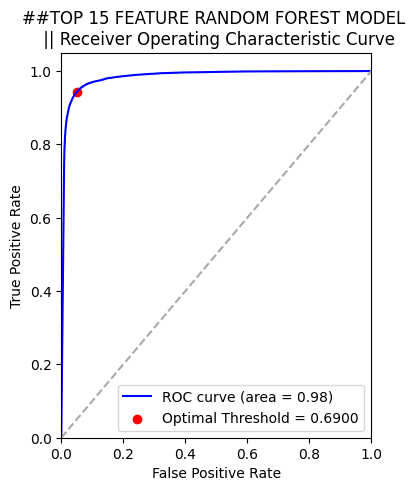

Optimal Threshold: 0.6900161227661227, AUC: 0.9839368249015703


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# With ba data
X_balance_diabetes_cc_top15 = diabetes_oversampled_data.drop(['Diabetes_binary',
                                                       'NoDocbcCost','Sex','CholCheck','Veggies','Fruits','AnyHealthcare'], axis=1)
y_balance_diabetes_cc_top15 = diabetes_oversampled_data['Diabetes_binary']

# Splitting the data into training and test sets
X_train_cc_top15, X_test_cc_top15, y_train_cc_top15, y_test_cc_top15 = train_test_split(X_balance_diabetes_cc_top15, y_balance_diabetes_cc_top15, test_size=0.3 , random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled_cc_top15 = scaler.fit_transform(X_train_cc_top15)
X_test_scaled_cc_top15 = scaler.transform(X_test_cc_top15)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

starttime = time.time()
# Train the model
clf.fit(X_train_cc_top15, y_train_cc_top15)
endtime = time.time()

# Make predictions
y_pred = clf.predict(X_test_cc_top15)

# Evaluate the model
accuracy = accuracy_score(y_test_cc_top15, y_pred)
report = classification_report(y_test_cc_top15, y_pred)
print ("## Balance Dataset ")
print ("============ [TOP 15 FEATURE] RANDOM FOREST MODEL =================")
print(f"Accuracy: {accuracy}")
print(report)
print(f"Time Training : {endtime - starttime} seconds")


y_probs = clf.predict_proba(X_test_cc_top15)[:, 1]
print("\n***************AOC*****************")
name = "TOP 15 FEATURE RANDOM FOREST MODEL \n"
optimal_cutoff = find_optimal_cutoff_with_visualization(y_test_cc_top15, y_probs, name)

